## Business Goal
'We aim to segement the Customers based on RFM so that the company can target its customers efficiently.'
: ~~~


he steps are broadly divided into:¶
- Step 1: Reading and Understanding the Data
- Step 2: Data Cleansing
- Step 3: Data Preparation
- Step 4: Model Building
- Step 5: Final Analysis

Step 1 : Reading and Understanding Data¶

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
data_path = '/Users/jun/GitStudy/Data_4/Data/eCommerce3'
os.chdir(data_path)

In [3]:
retail = pd.read_csv('capstone_data_cleaned.csv')
retail.head(4)

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,...,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,10/2/2017 10:56,10/2/2017 11:07,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,...,1,18.12,housewares,500.0,19.0,8.0,13.0,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,10/2/2017 10:56,10/2/2017 11:07,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,...,1,18.12,housewares,500.0,19.0,8.0,13.0,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,10/2/2017 10:56,10/2/2017 11:07,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,...,1,2.00,housewares,500.0,19.0,8.0,13.0,3149,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,10/2/2017 10:56,10/2/2017 11:07,10/10/2017 21:25,10/18/2017 0:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,...,1,2.00,housewares,500.0,19.0,8.0,13.0,3149,sao paulo,SP


In [4]:
retail.shape

(119614, 22)

In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119614 entries, 0 to 119613
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119614 non-null  object 
 1   customer_id                    119614 non-null  object 
 2   order_purchase_timestamp       119614 non-null  object 
 3   order_approved_at              119614 non-null  object 
 4   order_delivered_timestamp      119614 non-null  object 
 5   order_estimated_delivery_date  119614 non-null  object 
 6   order_item_id                  119614 non-null  int64  
 7   product_id                     119614 non-null  object 
 8   seller_id                      119614 non-null  object 
 9   price                          119614 non-null  float64
 10  shipping_charges               119614 non-null  float64
 11  payment_type                   119614 non-null  object 
 12  payment_installments          

Step 2: Data Cleansing

In [6]:
df_null = round(100*(retail.isnull().sum())/len(retail), 2)
df_null

order_id                         0.0
customer_id                      0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_timestamp        0.0
order_estimated_delivery_date    0.0
order_item_id                    0.0
product_id                       0.0
seller_id                        0.0
price                            0.0
shipping_charges                 0.0
payment_type                     0.0
payment_installments             0.0
payment_value                    0.0
product_category_name            0.0
product_weight_g                 0.0
product_length_cm                0.0
product_height_cm                0.0
product_width_cm                 0.0
customer_zip_code_prefix         0.0
customer_city                    0.0
customer_state                   0.0
dtype: float64

In [7]:
# 구매 아이디로 묶고 payment type N + voucher
# Voucher 금액 비율 별

In [8]:
#voucher 를 사용해 shipping charge 할인하니까 포함.


In [ ]:
retail['order_item_id'] = retail['order_item_id'].astype(str)
retail['customer_zip_code_prefix'] = retail['customer_zip_code_prefix'].astype(str)
retail['order_purchase_timestamp'] = pd.to_datetime(retail['order_purchase_timestamp'])
retail['order_delivered_timestamp'] = pd.to_datetime(retail['order_delivered_timestamp'])
retail['order_estimated_delivery_date'] = pd.to_datetime(retail['order_estimated_delivery_date'])
retail['order_approved_at']=pd.to_datetime(retail['order_approved_at'])
retail = retail.drop(columns='order_estimated_delivery_date')
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119614 entries, 0 to 119613
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   order_id                   119614 non-null  object        
 1   customer_id                119614 non-null  object        
 2   order_purchase_timestamp   119614 non-null  datetime64[ns]
 3   order_approved_at          119614 non-null  datetime64[ns]
 4   order_delivered_timestamp  119614 non-null  datetime64[ns]
 5   order_item_id              119614 non-null  object        
 6   product_id                 119614 non-null  object        
 7   seller_id                  119614 non-null  object        
 8   price                      119614 non-null  float64       
 9   shipping_charges           119614 non-null  float64       
 10  payment_type               119614 non-null  object        
 11  payment_installments       119614 non-null  int64   

In [10]:
retail = retail.drop_duplicates()
retail = retail.reset_index(drop=True)
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110343 entries, 0 to 110342
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   order_id                   110343 non-null  object        
 1   customer_id                110343 non-null  object        
 2   order_purchase_timestamp   110343 non-null  datetime64[ns]
 3   order_approved_at          110343 non-null  datetime64[ns]
 4   order_delivered_timestamp  110343 non-null  datetime64[ns]
 5   order_item_id              110343 non-null  object        
 6   product_id                 110343 non-null  object        
 7   seller_id                  110343 non-null  object        
 8   price                      110343 non-null  float64       
 9   shipping_charges           110343 non-null  float64       
 10  payment_type               110343 non-null  object        
 11  payment_installments       110343 non-null  int64   

In [18]:
retail.T

,0,1,2,3,4,5,6,7,8,9,...,110333,110334,110335,110336,110337,110338,110339,110340,110341,110342
order_id,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,69923a4e07ce446644394df37a710286,128e10d95713541c87cd1a2e48201934,0e7e841ddf8f8f2de2bad69267ecfbcf,bfc39df4f36c3693ff3b63fcbea9e90a,53cdb2fc8bc7dce0b6741e2150273451,40c5e18f7d112b59b3e5113a59a905b3,86674ccaee19790309333210917b2c7d,...,9b7fd5b0ef330dcbbb6397e5971faeec,aa07fc0f496d65986abc9044683b8800,5597332b7eded552f104108f22b023e4,add4f182072426430ee6c993eab97efe,87b4c933f31145a28413b39d880ad6c3,e8fd20068b9f7e6ec07068bb7537f781,e8fd20068b9f7e6ec07068bb7537f781,cfa78b997e329a5295b4ee6972c02979,9c5dedf39a927c1b2549525ed64a053c,66dea50a8b16d9b4dee7af250b4be1a5
customer_id,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,3a51803cc0d012c3b5dc8b7528cb05f7,ef0996a1a279c26e7ecbd737be23d235,e781fdcc107d13d865fc7698711cc572,af07308b275d755c9edb36a90c618231,7cfba6e55439cae3fd2479d62fafe67f,8b8028d453a01986b48c4271cc341475,...,45265f9d6c53836d632f904a3c1d0f1c,0b940c9e78e70637166bf09d0629dca2,8a898880a61e551c80bacadfb4356255,4515b05f3788bb7a5e66e63457aaf6ce,490c3c53ca927221bccbb00706afbcf9,fb9310710003399b031add3e55f34719,fb9310710003399b031add3e55f34719,a49e8e11e850592fe685ae3c64b40eca,6359f309b166b0196dbf7ad2ac62bb5a,60350aa974b26ff12caad89e55993bd6
order_purchase_timestamp,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-09-04 11:26:00,2017-08-15 18:29:00,2017-08-02 18:24:00,2017-10-23 23:26:00,2018-07-24 20:41:00,2018-06-11 10:25:00,2018-08-09 11:37:00,...,2017-05-17 15:48:00,2017-08-19 18:28:00,2018-08-15 13:03:00,2018-01-24 02:23:00,2018-03-02 17:12:00,2017-08-10 21:21:00,2017-08-10 21:21:00,2017-12-20 09:52:00,2017-03-09 09:54:00,2018-03-08 20:57:00
order_approved_at,2017-10-02 11:07:00,2017-10-02 11:07:00,2017-10-02 11:07:00,2017-09-04 11:43:00,2017-08-15 20:05:00,2017-08-02 18:43:00,2017-10-25 02:14:00,2018-07-26 03:24:00,2018-06-11 10:58:00,2018-08-09 14:35:00,...,2017-05-17 16:15:00,2017-08-19 18:44:00,2018-08-15 13:15:00,2018-01-25 02:58:00,2018-03-02 17:49:00,2017-08-10 21:35:00,2017-08-10 21:35:00,2017-12-20 10:09:00,2017-03-09 09:54:00,2018-03-09 11:20:00
order_delivered_timestamp,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-09-05 19:20:00,2017-08-18 14:44:00,2017-08-07 18:30:00,2017-11-07 18:04:00,2018-08-07 15:27:00,2018-06-19 00:31:00,2018-08-14 18:51:00,...,2017-05-29 15:18:00,2017-08-25 16:05:00,2018-08-17 16:06:00,2018-01-29 23:33:00,2018-03-16 17:21:00,2017-08-23 15:36:00,2017-08-23 15:36:00,2018-01-26 15:45:00,2017-03-17 15:08:00,2018-03-16 13:08:00
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,1,1,1
product_id,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,9abb00920aae319ef9eba674b7d2e6ff,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,595fac2a385ac33a80bd5114aec74eb8,595fac2a385ac33a80bd5114aec74eb8,595fac2a385ac33a80bd5114aec74eb8,...,afb83a05bfcf46258f04ce060671d5b4,77feb885b9ca6c9b64934b33e3c0e15e,6db72cc3d861dbea370e6959aa850b8c,e68ede48908dfec1ba4abbcdb86b420f,cbaf5898b92064cd5e399c7cff291d0a,0df37da38a30a713453b03053d60d3f7,0df37da38a30a713453b03053d60d3f7,3d2c44374ee42b3003a470f3e937a2ea,ac35486adb7b02598c182c2ff2e05254,006619bbed68b000c8ba3f8725d5409e
seller_id,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,1771297ac436903d1dd6b0e9279aa505,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,289cdb325fb7e7f891c38608bf9e0962,ef0ace09169ac090589d85746e3e036f,289cdb325fb7e7f891c38608bf9e0962,...,e2aee0892199b1d92530e371abd825bf,2f73e04d12cdf0c945ded66bb3fcf6c7,31561f325664a8a7aba4c8d0c3a9b3db,fa1c13f2614d7b5c4749cbc52fecda94,06a2c3af7b3aee5d69171b0e14f0ee87,218d46b86c1881d022bce9c68a7d4b15,

In [11]:
payment_list = sorted(retail['payment_type'].unique())

In [12]:
# 그룹화된 payment_type을 sorted된 순서로 결합
result = (
    retail[['order_id', 'payment_type']]
    .groupby('order_id')['payment_type']
    .apply(lambda x: '/'.join(sorted(set(x), key=lambda y: payment_list.index(y))))
    .reset_index()
)
result

,order_id,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card
1,000229ec398224ef6ca0657da4fc703e,credit_card
2,00024acbcdf0a6daa1e931b038114c75,credit_card
3,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card
4,00048cc3ae777c65dbb7d2a0634bc1ea,wallet
...,...,...
92923,fffc94f6ce00a00581880bf54a75a037,wallet
92924,fffcd46ef2263f404302a634eb57f7eb,wallet
92925,fffce4705a9662cd70adb13d4a31832d,credit_card
92926,fffe18544ffabc95dfada21779c9644f,credit_card


In [17]:
result['payment_type'].unique()

array(['credit_card', 'wallet', 'credit_card/voucher', 'debit_card',
       'voucher', 'credit_card/debit_card'], dtype=object)

In [13]:
columns_to_remove = ['shipping_charges', 'payment_type', 'payment_value']
retail_cleaned = retail.drop(columns=columns_to_remove)
retail_grouped = retail_cleaned.groupby('order_id').first().reset_index()
merged_df = result.merge(retail_grouped, on='order_id', how='left')

# 결과 확인
merged_df.T

,0,1,2,3,4,5,6,7,8,9,...,92918,92919,92920,92921,92922,92923,92924,92925,92926,92927
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00042b26cf59d7ce69dfabb4e55b4fd9,00048cc3ae777c65dbb7d2a0634bc1ea,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,...,fffa82886406ccf10c7b4e35c4ff2788,fffb0b1a50e65c449020434fa835e078,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe18544ffabc95dfada21779c9644f,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,wallet,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,64b576fb70d441e8f1b2d7d446e483c5,85c835d128beae5b4ce8602c491bf385,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,...,2a3ab9bf9639491997586882c502540a,b2d2b4204f7fc4b4aeca38e3cd680a7e,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,eb803377c9315b564bdedad672039306,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_purchase_timestamp,2017-09-13 08:59:00,2018-01-14 14:33:00,2018-08-08 10:00:00,2017-02-04 13:57:00,2017-05-15 21:42:00,2017-12-10 11:53:00,2018-07-04 12:08:00,2018-03-19 18:40:00,2018-07-02 13:59:00,2018-03-24 22:16:00,...,2017-12-18 16:33:00,2017-04-12 16:35:00,2018-03-30 15:36:00,2017-10-27 16:51:00,2018-06-19 09:27:00,2018-04-23 13:57:00,2018-07-14 10:26:00,2017-10-23 17:07:00,2017-08-14 23:02:00,2018-06-09 17:00:00
order_approved_at,2017-09-13 09:45:00,2018-01-14 14:48:00,2018-08-08 10:10:00,2017-02-04 14:10:00,2017-05-17 03:55:00,2017-12-10 12:10:00,2018-07-05 16:35:00,2018-03-20 18:35:00,2018-07-02 14:10:00,2018-03-24 22:28:00,...,2017-12-18 17:33:00,2017-04-12 16:45:00,2018-04-03 05:08:00,2017-10-28 02:55:00,2018-06-19 09:58:00,2018-04-25 04:11:00,2018-07-17 04:31:00,2017-10-24 17:14:00,2017-08-15 00:04:00,2018-06-09 17:10:00
order_delivered_timestamp,2017-09-20 23:43:00,2018-01-22 13:19:00,2018-08-14 13:32:00,2017-03-01 16:42:00,2017-05-22 13:44:00,2017-12-18 22:03:00,2018-07-09 14:04:00,2018-03-29 18:17:00,2018-07-04 17:28:00,2018-03-29 00:04:00,...,2018-01-08 18:23:00,2017-05-17 11:38:00,2018-04-16 16:56:00,2017-11-17 19:41:00,2018-07-05 17:51:00,2018-05-10 22:56:00,2018-07-23 20:31:00,2017-10-28 12:22:00,2017-08-16 21:59:00,2018-06-14 17:56:00
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,ac6c3623068f30de03045865e4e10089,ef92defde845ab8450f9d70c526ef70f,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,...,bbe7651fef80287a816ead73f065fc4b,e7be84ea9462aac5e2b0b08eb35ba7f1,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,9c422a519119dcad7575db5af1ba540e,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,df560393f3a51e74553ab94004ba5c87,6426d21aca402a131fc0a5d0960a3c90,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c

In [16]:
retail['payment_type'].unique()

array(['credit_card', 'voucher', 'wallet', 'debit_card'], dtype=object)

In [14]:
merged_df['customer_state'].unique()

array(['RJ', 'MG', 'SP', 'PR', 'GO', 'BA', 'AL', 'MS', 'CE', 'DF', 'RS',
       'PE', 'SC', 'ES', 'MA', 'PA', 'MT', 'PB', 'AM', 'AP', 'PI', 'TO',
       'RO', 'RN', 'SE', 'AC', 'RR'], dtype=object)

Step 3: Data Preparation

We are going to analysis the Customers based on below 3 factors

- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)


In [15]:
# New Attribute : Monetary

rfm_m = retail.groupby('customer_id')['price'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,customer_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00


In [16]:
# New Attribute : Frequency
rfm_f = retail.groupby('customer_id')['order_id'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['customer_id', 'Frequency']
rfm_f.head()

,customer_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [17]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='customer_id', how='inner')
rfm.head()

,customer_id,price,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1
2,0000f46a3911fa3c0805444483337064,69.00,1
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1
4,0004aac84e0df4da2b147fca70cf8255,180.00,1


In [18]:
# New Attribute : Recency

# Compute the maximum date to know the last transaction date
max_date = max(retail['order_approved_at'])
max_date


Timestamp('2018-08-29 15:10:00')

In [ ]:
# Compute the difference between max date and transaction date
retail['Diff'] = max_date - retail['order_approved_at']
retail.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_item_id,product_id,seller_id,price,shipping_charges,...,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,customer_city,customer_state,Diff
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-10 21:25:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,...,18.12,housewares,500.0,19.0,8.0,13.0,3149,sao paulo,SP,331 days 04:03:00
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-10 21:25:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,...,2.00,housewares,500.0,19.0,8.0,13.0,3149,sao paulo,SP,331 days 04:03:00
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-10 21:25:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,...,18.59,housewares,500.0,19.0,8.0,13.0,3149,sao paulo,SP,331 days 04:03:00
3,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,2017-09-04 11:26:00,2017-09-04 11:43:00,2017-09-05 19:20:00,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,35.39,8.72,...,44.11,baby,350.0,19.0,14.0,12.0,3149,sao paulo,SP,359 days 03:27:00
4,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,2017-08-15 18:29:00,2017-08-15 20:05:00,2017-08-18 14:44:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,...,37.77,housewares,500.0,19.0,8.0,13.0,3366,sao paulo,SP,378 days 19:05:00


In [20]:
# Compute last transaction date to get the recency of customers

rfm_p = retail.groupby('customer_id')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,customer_id,Diff
0,0000366f3b9a7992bf8c76cfdf3221e2,111 days 03:59:00
1,0000b849f77a49e4a4ce2b2a4ca5be3f,113 days 20:45:00
2,0000f46a3911fa3c0805444483337064,536 days 18:05:00
3,0000f6ccb0745a6a4b88665a16c9f078,320 days 18:21:00
4,0004aac84e0df4da2b147fca70cf8255,287 days 19:04:00


In [21]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,customer_id,Diff
0,0000366f3b9a7992bf8c76cfdf3221e2,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,113
2,0000f46a3911fa3c0805444483337064,536
3,0000f6ccb0745a6a4b88665a16c9f078,320
4,0004aac84e0df4da2b147fca70cf8255,287


In [22]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='customer_id', how='inner')
rfm.columns = ['customer_id', 'Amount', 'Frequency', 'Recency']
rfm.head()

,customer_id,Amount,Frequency,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,113
2,0000f46a3911fa3c0805444483337064,69.00,1,536
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1,320
4,0004aac84e0df4da2b147fca70cf8255,180.00,1,287


There are 2 types of outliers and we will treat outliers as it can skew our dataset
- Statistical (통계적 IQR, 표준편차 등)
- Domain specific (도메인 특화 이상치)

Text(0.5, 0, 'Attributes')

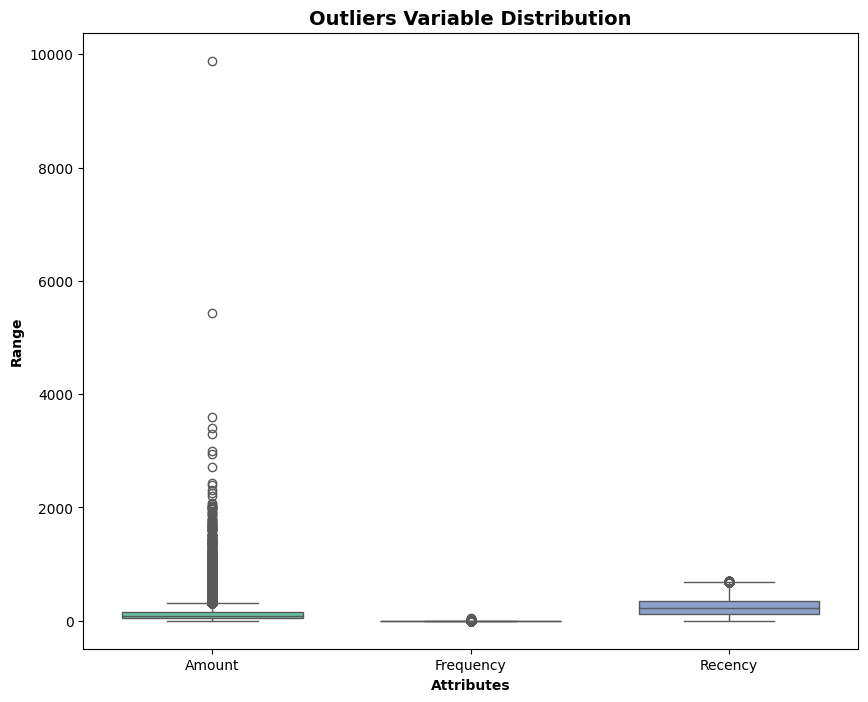

In [23]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [24]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

Rescaling the Attributes

It is extremely important to rescale the variables so that they have a comparable scale.| There are two common ways of rescaling:


1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [25]:
# Rescaling the attributes
from sklearn.preprocessing import StandardScaler

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(88216, 3)

In [26]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,0.082385,-0.370473,-0.818262
1,-0.839322,-0.370473,-0.805130
2,-0.423308,-0.370473,1.972206
3,-0.780449,-0.370473,0.553992
4,0.498398,-0.370473,0.337320


Step 4: Model Building

K-Means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

- First we initialize k points, called means, randomly.
- We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
- We repeat the process for a given number of iterations and at the end, we have our clusters.

In [27]:
from sklearn.cluster import KMeans
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [28]:
kmeans.labels_

array([0, 0, 1, ..., 1, 0, 1], dtype=int32)

Finding the Optimal Number of Clusters

</br>

Elbow Curve to get the right number of Clusters

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

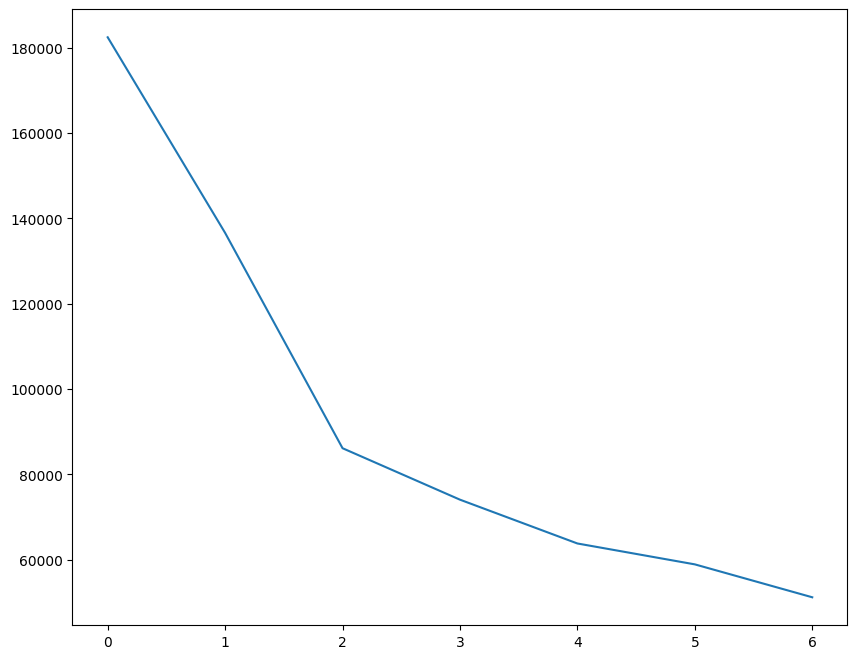

In [29]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

Silhouette Analysis
</br></br>

silhouette score = $\displaystyle \frac{𝑝−𝑞}{𝑚𝑎𝑥(𝑝,𝑞)}$


𝑝 is the mean distance to the points in the nearest cluster that the data point is not a part of

𝑞 is the mean intra-cluster distance to all the points in its own cluster.

- The value of the silhouette score range lies between -1 to 1.

- A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

- A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [31]:
from sklearn.metrics import silhouette_score

# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.31768633544928115
For n_clusters=3, the silhouette score is 0.39931654295518865
For n_clusters=4, the silhouette score is 0.43976496151560507
For n_clusters=5, the silhouette score is 0.36909970905978123
For n_clusters=6, the silhouette score is 0.3877669186539096
For n_clusters=7, the silhouette score is 0.3843225658736631
For n_clusters=8, the silhouette score is 0.3897212500762437
For n_clusters=9, the silhouette score is 0.38792538890065


In [32]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [33]:
kmeans.labels_

array([0, 0, 2, ..., 2, 0, 2], dtype=int32)

In [34]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,customer_id,Amount,Frequency,Recency,Cluster_Id
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,111,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,113,0
2,0000f46a3911fa3c0805444483337064,69.00,1,536,2
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1,320,2
4,0004aac84e0df4da2b147fca70cf8255,180.00,1,287,2


<Axes: xlabel='Cluster_Id', ylabel='Amount'>

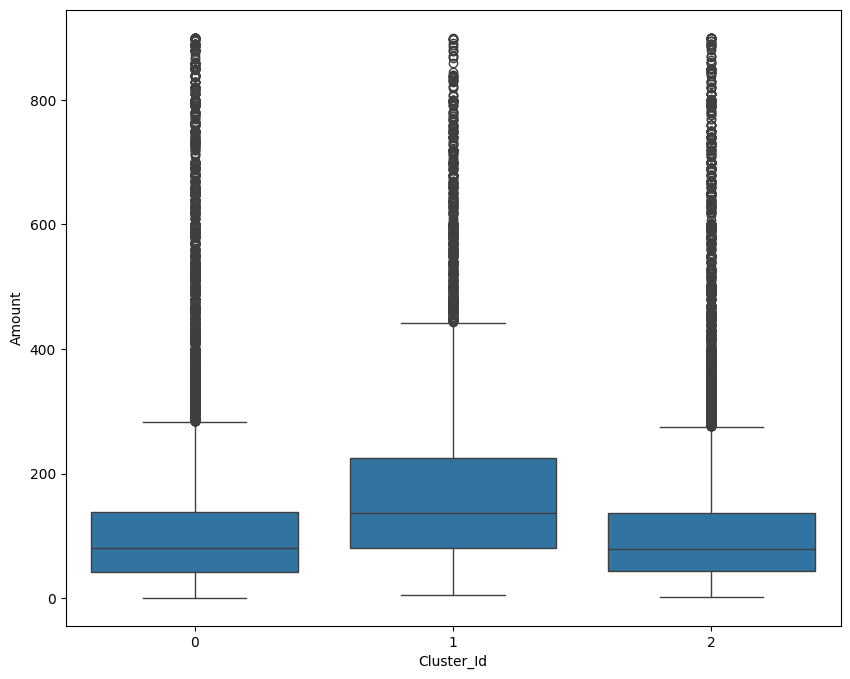

In [35]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

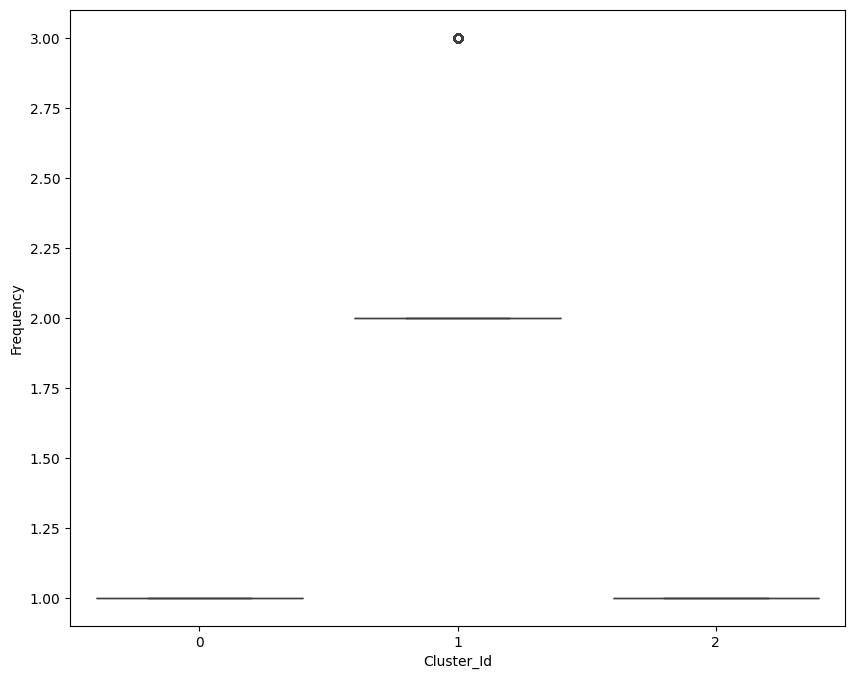

In [36]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='Recency'>

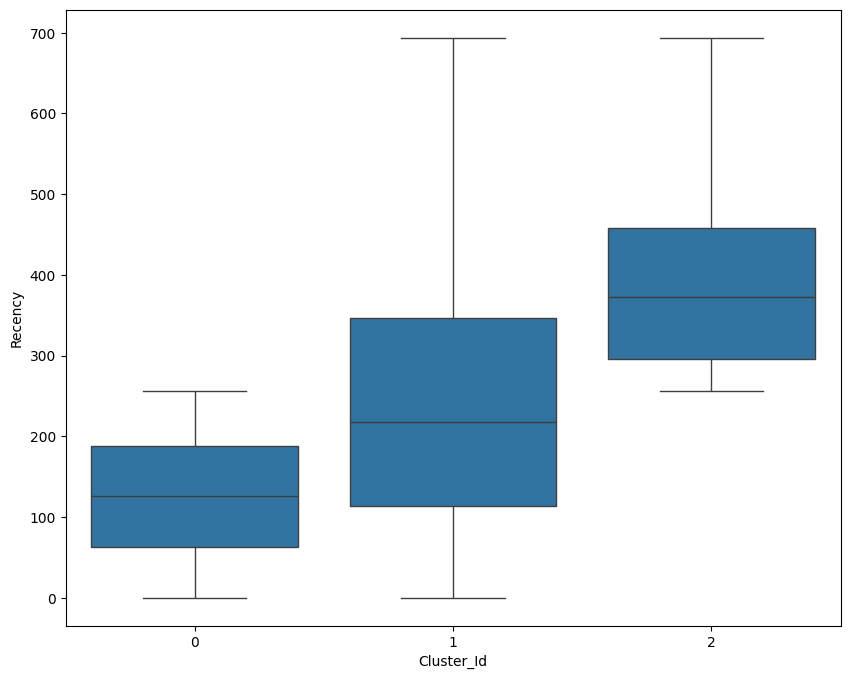

In [37]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

- Divisive
- Agglomerative

Single Linkage:

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

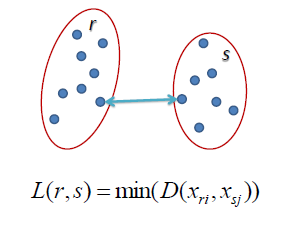

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from tqdm import tqdm

# Single linkage: 
def linkage_with_progress(data, method='single', metric='euclidean'):
    # Get the total number of merges
    n = len(data)
    mergings = []
    
    # Use tqdm to show the progress of the linkage computation
    with tqdm(total=n-1, desc="Linkage Progress", unit="merge") as pbar:
        for _ in range(n-1):  # There will be n-1 merges
            # Perform one step of the linkage computation
            merge = linkage(data, method=method, metric=metric)
            mergings.append(merge)
            pbar.update(1)  # Update the progress bar
    return mergings

# Call the linkage function and track progress
mergings = linkage_with_progress(rfm_df_scaled)

# Create the dendrogram
plt.figure(figsize=(8, 4))
dendrogram(mergings)
plt.show()


Linkage Progress:   0%|          | 0/88215 [00:00<?, ?merge/s]

Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

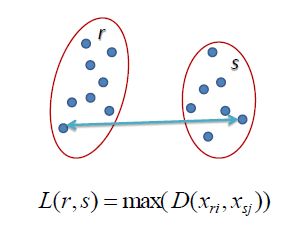

In [ ]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import cut_tree

Step 3: Data Preparation

Step 5: Final Analysis